In [0]:
import numpy as np
import pandas as pd
import pickle

from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls '/content/drive/My Drive/Colab Notebooks/churn'

'Colab Churn.ipynb'


In [0]:
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/"

rfile = open(DATA_PATH +'random_split_churn.pickle','rb')

x_train, y_train, x_test, y_test = pickle.load(rfile)

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]      
                

In [90]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)            

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [94]:
rf = RandomForestClassifier()
      # Random search of parameters, using 3 fold cross validation,
      # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1) # Fit the random search model
rf_random.fit(x_train, y_train.ravel())
            


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
def report(results, n_top=1):
           
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            return results['mean_test_score'][candidate], results['std_test_score'][candidate], results['params'][candidate]

In [0]:
mean_test_score, std_test_score, params_list = report(rf_random.cv_results_, n_top=1)

In [99]:
mean_test_score, std_test_score, params_list

(0.9609410674157169,
 0.007343412496715281,
 {'bootstrap': False,
  'max_depth': 50,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1000})

In [0]:
bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators = params_list.values()

In [20]:
bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators

(400, 2, 1, 'sqrt', None, False)

In [2]:
 m = RandomForestClassifier(**params_list)

NameError: ignored

In [0]:
def score(m):
    res = {"Score on training set" : m.score(x_train, y_train),
           "Score on validation set" : m.score(x_test, y_test)}
    return res

In [135]:
## Fit model to training set
m.fit(x_train, y_train.ravel())
    
## Calculate score    
score(m)

{'Score on training set': 1.0, 'Score on validation set': 0.85}

In [1]:
m

NameError: ignored

In [0]:
pkl_filename = "rfc_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(m, file)

In [0]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [134]:
pickle_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# import os
# I better remember this.
# filename = ... # The name of the pickle file in your Google Drive
# data = pickle.load(os.path.join(GDRIVE_DIR, filename))

In [24]:
y_pred=m.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8523333333333334


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2185,  184],
       [ 303,  328]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


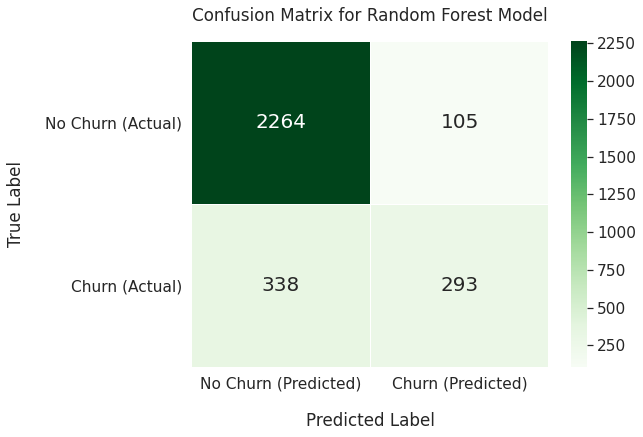

In [29]:
# matrix = metrics.confusion_matrix(y_test, y_pred)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

import matplotlib.pyplot as plt
import seaborn as sns

# Build the plot
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='d')

# Add labels to the plot
class_names_y = ['No Churn (Actual)', 'Churn (Actual)']
class_names_x = ['No Churn (Predicted)', 'Churn (Predicted)']


tick_marks = np.arange(len(class_names_y))+0.5

plt.xticks(tick_marks, class_names_x, rotation=0)
plt.yticks(tick_marks, class_names_y, rotation=0)
plt.xlabel('Predicted Label', labelpad=20)
plt.ylabel('True Label', labelpad=20)
plt.title('Confusion Matrix for Random Forest Model', pad=20)
plt.show()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2369
           1       0.74      0.46      0.57       631

    accuracy                           0.85      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [81]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10)
et.fit(x_train, y_train)
print(et.feature_importances_)

[0.13067662 0.02364862 0.21984959 0.10493957 0.13230527 0.14885742
 0.02541665 0.04261582 0.12789805 0.01633856 0.01719681 0.01025702]


1 **creditscore** 2 gender 3 **age** 4 **tenure** 5 **balance** 6 **numofproducts** 
7 hascrcard 8 isactivemember 9 **estimatedsalary** 10 c_France 11 c_Germany 12 c_Spain 

**Original**

In [0]:
cfile = open(DATA_PATH +'churn.pickle','rb')

x_train, y_train, x_test, y_test = pickle.load(cfile)

In [0]:
c = RandomForestClassifier()

In [34]:
## Fit model to training set
c.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
score(c)

{'Score on training set': 1.0, 'Score on validation set': 0.854}

In [36]:
y_pred=c.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.854


In [40]:
c = confusion_matrix(y_test, y_pred)
c

array([[2272,   97],
       [ 341,  290]])

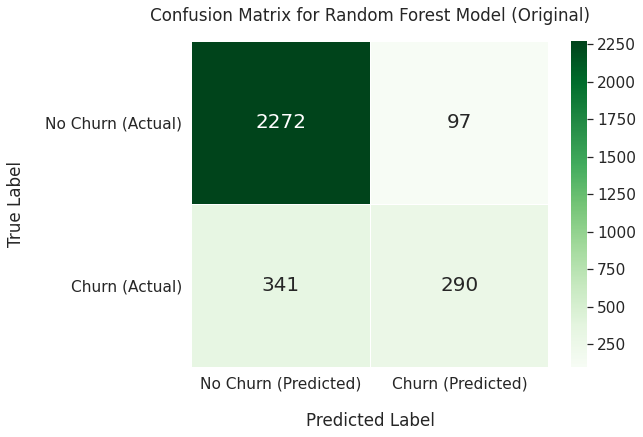

In [75]:
# Build the plot
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(c, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='d')

# Add labels to the plot
class_names_y = ['No Churn (Actual)', 'Churn (Actual)']
class_names_x = ['No Churn (Predicted)', 'Churn (Predicted)']


tick_marks = np.arange(len(class_names_y))+0.5

plt.xticks(tick_marks, class_names_x, rotation=0)
plt.yticks(tick_marks, class_names_y, rotation=0)
plt.xlabel('Predicted Label', labelpad=20)
plt.ylabel('True Label', labelpad=20)
plt.title('Confusion Matrix for Random Forest Model (Original)', pad=20)
plt.show()

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2369
           1       0.75      0.46      0.57       631

    accuracy                           0.85      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



**SMOTE**

In [0]:
sfile = open(DATA_PATH +'smote.pickle','rb')

x_train, y_train, x_test, y_test = pickle.load(sfile)

In [45]:
s = RandomForestClassifier()
## Fit model to training set
s.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
score(s)

{'Score on training set': 1.0, 'Score on validation set': 0.8396666666666667}

In [47]:
y_pred=s.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8396666666666667


In [49]:
s = confusion_matrix(y_test, y_pred)
s

array([[2142,  227],
       [ 254,  377]])

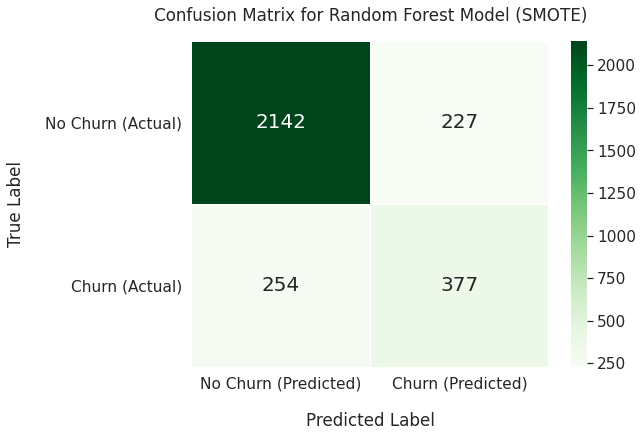

In [74]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(s, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='d')

# Add labels to the plot
class_names_y = ['No Churn (Actual)', 'Churn (Actual)']
class_names_x = ['No Churn (Predicted)', 'Churn (Predicted)']


tick_marks = np.arange(len(class_names_y))+0.5

plt.xticks(tick_marks, class_names_x, rotation=0)
plt.yticks(tick_marks, class_names_y, rotation=0)
plt.xlabel('Predicted Label', labelpad=20)
plt.ylabel('True Label', labelpad=20)
plt.title('Confusion Matrix for Random Forest Model (SMOTE)', pad=20)
plt.show()

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2369
           1       0.62      0.60      0.61       631

    accuracy                           0.84      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.84      0.84      0.84      3000



**SMOTE XGB w/o params**

In [56]:
from xgboost import XGBClassifier

sfile = open(DATA_PATH +'smote.pickle','rb')

x_train, y_train, x_test, y_test = pickle.load(sfile)

sx = XGBClassifier()
## Fit model to training set
sx.fit(x_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
score(sx)

{'Score on training set': 0.8787093314265284,
 'Score on validation set': 0.8356666666666667}

In [58]:
y_pred=sx.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8356666666666667


In [59]:
sx = confusion_matrix(y_test, y_pred)
sx

array([[2099,  270],
       [ 223,  408]])

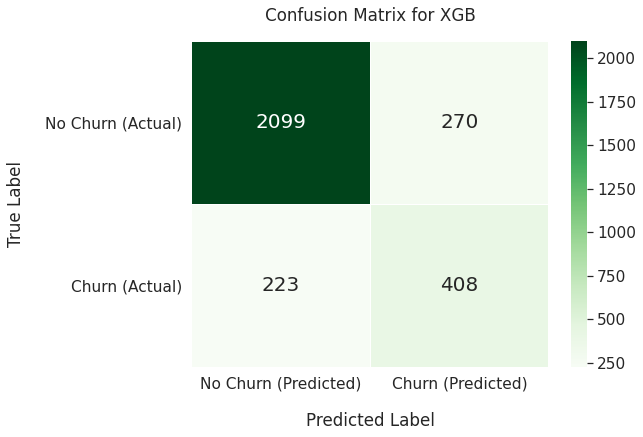

In [73]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(sx, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='d')

# Add labels to the plot
class_names_y = ['No Churn (Actual)', 'Churn (Actual)']
class_names_x = ['No Churn (Predicted)', 'Churn (Predicted)']


tick_marks = np.arange(len(class_names_y))+0.5

plt.xticks(tick_marks, class_names_x, rotation=0)
plt.yticks(tick_marks, class_names_y, rotation=0)
plt.xlabel('Predicted Label', labelpad=20)
plt.ylabel('True Label', labelpad=20)
plt.title('Confusion Matrix for XGB', pad=20)
plt.show()

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2369
           1       0.60      0.65      0.62       631

    accuracy                           0.84      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.84      0.84      0.84      3000



**SMOTE XGB with Hypertuning**

In [62]:
xg = XGBClassifier()
      # Random search of parameters, using 3 fold cross validation,
      # search across 100 different combinations, and use all available cores
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1) # Fit the random search model
xg_random.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 61.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                               

In [63]:
mean_test_score, std_test_score, params_list = report(xg_random.cv_results_, n_top=1)
mean_test_score, std_test_score, params_list

(0.8781836730732316,
 0.08428442238718391,
 {'bootstrap': True,
  'max_depth': 10,
  'max_features': 'auto',
  'min_samples_leaf': 4,
  'min_samples_split': 5,
  'n_estimators': 200})

In [0]:
 xgb = XGBClassifier(**params_list)

In [65]:
## Fit model to training set
xgb.fit(x_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              max_features='auto', min_child_weight=1, min_samples_leaf=4,
              min_samples_split=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
score(xgb)

{'Score on training set': 0.9979442259563819,
 'Score on validation set': 0.8376666666666667}

In [67]:
y_pred=xgb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8376666666666667


In [69]:
cxgb = confusion_matrix(y_test, y_pred)
cxgb

array([[2185,  184],
       [ 303,  328]])

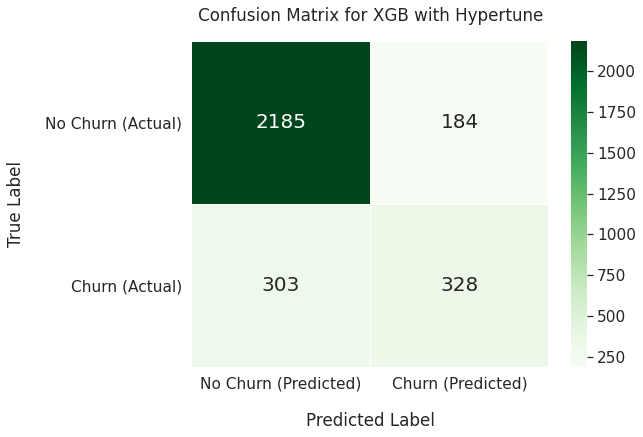

In [72]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cxgb, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='d')

# Add labels to the plot
class_names_y = ['No Churn (Actual)', 'Churn (Actual)']
class_names_x = ['No Churn (Predicted)', 'Churn (Predicted)']


tick_marks = np.arange(len(class_names_y))+0.5

plt.xticks(tick_marks, class_names_x, rotation=0)
plt.yticks(tick_marks, class_names_y, rotation=0)
plt.xlabel('Predicted Label', labelpad=20)
plt.ylabel('True Label', labelpad=20)
plt.title('Confusion Matrix for XGB with Hypertune', pad=20)
plt.show()

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2369
           1       0.64      0.52      0.57       631

    accuracy                           0.84      3000
   macro avg       0.76      0.72      0.74      3000
weighted avg       0.83      0.84      0.83      3000

